## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle


### Loading data

In [3]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### training and testing data

In [4]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
predict = "G3"
print(data.shape)
x = np.array(data.drop([predict], axis= 1))#features
y = np.array(data[predict])#labels

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.3)


(395, 6)


### Machine Learning model

In [5]:
linear = LinearRegression()

#### fitting the model

In [6]:

linear.fit(x_train,y_train)

LinearRegression()

#### accuracy

In [7]:

acc = linear.score(x_test,y_test)
acc

0.7930747582241622

#### coefficient


In [8]:
linear.coef_

array([ 0.13271135,  0.9840904 , -0.1861927 , -0.15231509,  0.02817815])

#### intercept

In [9]:

linear.intercept_

-1.282606516246931

In [10]:
#predictions
pred = linear.predict(x_test)
for i in range(len(pred)):
    print(pred[i], x_test[i],y_test[i])

15.043552980715011 [16 15  3  0  0] 15
9.811930895239769 [10 10  1  0  4] 10
14.910841628502583 [15 15  3  0  0] 15
12.820558395132165 [10 13  1  0  6] 13
12.677238128857528 [13 13  3  0  0] 13
-0.9122051533482924 [7 0 3 0 0] 0
14.885092973590874 [12 15  1  0  0] 15
8.999784377227773 [11  9  2  0 12] 9
8.376225092342017 [8 9 2 0 4] 10
9.56938188731486 [10 10  2  0  2] 10
11.246836782990878 [ 9 12  3  0  3] 11
8.39909878884197 [10  9  3  0  2] 9
13.049623530583117 [13 13  1  0  0] 12
10.48286715659814 [11 11  4  0  8] 10
12.677238128857528 [13 13  3  0  0] 14
12.787075784570005 [12 13  2  0  2] 13
9.056140684289888 [11  9  2  0 14] 9
7.826626320343129 [10  8  2  0 10] 8
7.2794220806076915 [8 8 2 0 0] 0
15.15339063642749 [15 15  2  0  2] 14
7.335778387669807 [8 8 2 0 2] 8
12.045534394884822 [12 12  1  0  4] 13
3.723220393977977 [6 5 3 1 0] 0
13.847521227330418 [13 14  2  0  0] 15
6.063811645710737 [8 7 2 3 8] 8
10.231693273437974 [ 8 11  2  0  0] 11
13.98023257954285 [14 14  2  0  0] 14


### importing matplotlib and pickle

In [11]:
import pickle
from matplotlib import style
import matplotlib.pyplot as plt

### pickling

In [12]:
with open("stu.pickle","wb") as f:
    pickle.dump(linear,f)

#### Loading our model

In [13]:
pik = open('stu.pickle','rb')
linear = pickle.load(pik)

### Training multiple model

In [14]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("stu.pickle", "wb") as f:
            pickle.dump(linear, f)

NameError: name 'linear_model' is not defined

In [ ]:
best

### Plotting graph

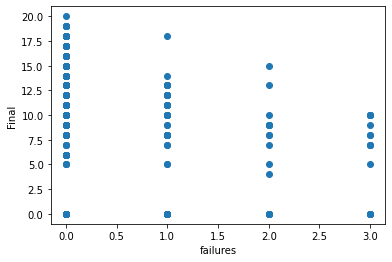

In [15]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
#plt.legend("studentmarks",loc = 4)
plt.xlabel(plot)
plt.ylabel("Final")
plt.show()